## Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import sklearn

In [2]:
auto_price = pd.read_csv('data/imports-85.csv', header=None)
auto_price.columns = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style',
                       'drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type',
                       'num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower',
                       'peak_rpm','city_mpg','highway_mpg','price']
auto_price.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
auto_price = auto_price.replace('?', np.nan)

In [4]:
auto_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [5]:
auto_price.iloc[:,:-1] = auto_price.iloc[:,:-1].fillna(auto_price.iloc[:,:-1].median())

In [6]:
auto_price['price'] = auto_price['price'].apply(pd.to_numeric, errors='coerce')
auto_price['price'] = auto_price['price'].fillna(auto_price['price'].mean())

In [7]:
auto_price['num_of_doors'].value_counts()

four    114
two      89
Name: num_of_doors, dtype: int64

In [8]:
auto_price['num_of_doors'] = auto_price['num_of_doors'].fillna('four')

In [9]:
auto_price.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
auto_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [11]:
auto_price = auto_price.applymap(str)

In [12]:
import re
def convert_numeric(text):
    if re.match('\d*.[0-9]', text):
        value = float(text)
    else:
        value = text       
    return value
    
auto_price = auto_price.applymap(convert_numeric)

In [13]:
auto_price.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [14]:
auto_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    object 
 1   normalized_losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    float64
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

## Data preprocessing

In [15]:
auto_price.select_dtypes(include=['object']).head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [16]:
print(auto_price['num_of_doors'].value_counts())
print('--------------\n')
print(auto_price['num_of_cylinders'].value_counts())

four    116
two      89
Name: num_of_doors, dtype: int64
--------------

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num_of_cylinders, dtype: int64


In [17]:
updated_nums= {'num_of_doors': {'two': 2, 'four': 4},
              'num_of_cylinders': {'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}}

In [18]:
auto_price.replace(updated_nums, inplace = True)

In [19]:
auto_price['symboling'] = auto_price['symboling'].astype(int)

In [20]:
# Categorical to binary numeric
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

columns = auto_price.select_dtypes(include=['object']).columns
auto_price[columns] = auto_price.select_dtypes(include=['object']).apply(lb.fit_transform)

In [21]:
auto_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int32  
 1   normalized_losses  205 non-null    float64
 2   make               205 non-null    int32  
 3   fuel_type          205 non-null    int32  
 4   aspiration         205 non-null    int32  
 5   num_of_doors       205 non-null    int64  
 6   body_style         205 non-null    int32  
 7   drive_wheels       205 non-null    int32  
 8   engine_location    205 non-null    int32  
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    float64
 14  engine_type        205 non-null    int32  
 15  num_of_cylinders   205 non-null    int64  
 16  engine_size        205 non

In [22]:
# Define features X
X = np.asarray(auto_price.iloc[:,:-1])
X[0:5]

array([[3.000e+00, 1.150e+02, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 8.860e+01, 1.688e+02, 6.410e+01,
        4.880e+01, 2.548e+03, 0.000e+00, 4.000e+00, 1.300e+02, 5.000e+00,
        3.470e+00, 2.680e+00, 9.000e+00, 1.110e+02, 5.000e+03, 2.100e+01,
        2.700e+01],
       [3.000e+00, 1.150e+02, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 8.860e+01, 1.688e+02, 6.410e+01,
        4.880e+01, 2.548e+03, 0.000e+00, 4.000e+00, 1.300e+02, 5.000e+00,
        3.470e+00, 2.680e+00, 9.000e+00, 1.110e+02, 5.000e+03, 2.100e+01,
        2.700e+01],
       [1.000e+00, 1.150e+02, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 9.450e+01, 1.712e+02, 6.550e+01,
        5.240e+01, 2.823e+03, 5.000e+00, 6.000e+00, 1.520e+02, 5.000e+00,
        2.680e+00, 3.470e+00, 9.000e+00, 1.540e+02, 5.000e+03, 1.900e+01,
        2.600e+01],
       [2.000e+00, 1.640e+02, 1.000e+00, 1.000e+00, 

In [23]:
# Define target y
y = np.asarray(auto_price['price'])
y[0:5]

array([13495., 16500., 16500., 13950., 17450.])

In [24]:
# Standardize the dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.74347043, -0.17650339, -1.94825569,  0.32879797, -0.46929532,
        -1.14165266, -3.05097525,  1.21333041, -0.12186667, -1.6907718 ,
        -0.42652147, -0.84478235, -2.0204173 , -0.01456628, -2.86510549,
        -0.35288699,  0.07444893,  0.8695675 ,  0.52048915, -1.84134525,
        -0.28834891,  0.17330945, -0.26498274, -0.64655303, -0.54605874],
       [ 1.74347043, -0.17650339, -1.94825569,  0.32879797, -0.46929532,
        -1.14165266, -3.05097525,  1.21333041, -0.12186667, -1.6907718 ,
        -0.42652147, -0.84478235, -2.0204173 , -0.01456628, -2.86510549,
        -0.35288699,  0.07444893,  0.8695675 ,  0.52048915, -1.84134525,
        -0.28834891,  0.17330945, -0.26498274, -0.64655303, -0.54605874],
       [ 0.133509  , -0.17650339, -1.94825569,  0.32879797, -0.46929532,
        -1.14165266, -0.71720687,  1.21333041, -0.12186667, -0.70859588,
        -0.23151305, -0.19056612, -0.54352748,  0.51488192,  1.88688986,
         1.50203181,  0.60404617,  0.8695675 , -2

## Validation and Model Selection

### Train/Test Dataset
Let's split dataset into 80% train and 20% test set.

In [25]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (164, 25) (164,)
Test set: (41, 25) (41,)


### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Validation on training set

In [27]:
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2289.640388124532

#### Cross-validation

In [28]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [29]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standart deviation:', scores.std())

display_scores(lin_rmse_scores)

Scores: [6416.30840779 3302.35265266 5520.12657566 4082.41286789 3807.31833563
 6202.1911524  6287.6338884  2958.54184275 2596.20012344 2887.61621538]
Mean: 4406.070206200092
Standart deviation: 1463.100559766106


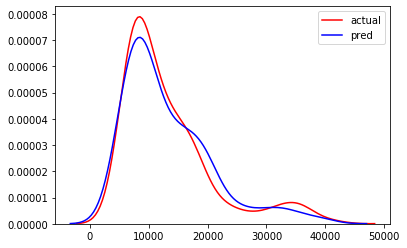

In [30]:
import seaborn as sns
ax1=sns.distplot(y_train, hist=False, color='r',label='actual')
sns.distplot(y_pred, hist=False,color='b',label='pred',ax=ax1)

### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Validation on training set

In [32]:
y_pred = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train,y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

242.8766499134298

#### Cross-validation

In [33]:
tree_scores = cross_val_score(tree_reg, X, y, scoring='neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [5441.63906908 1334.15282554 5871.57500032 4094.29042053 4254.93696445
 5009.65829923 7276.39291578 1957.29288815 1702.48397937 3168.00262784]
Mean: 4011.042499027661
Standart deviation: 1861.669513452353


### Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Validation on training set

In [35]:
y_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

808.8199069956568

#### Cross-validation

In [36]:
forest_scores = cross_val_score(forest_reg, X, y, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [4884.89384543 1293.54452453 2916.64481103 5039.68928291 2541.71802837
 3555.85399603 5399.76408956 1816.98107504 2061.19386857 2836.12842271]
Mean: 3234.6411944182983
Standart deviation: 1366.2773874463014


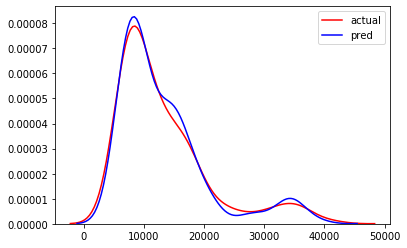

In [37]:
import seaborn as sns
ax1=sns.distplot(y_train, hist=False, color='r',label='actual')
sns.distplot(y_pred, hist=False,color='b',label='pred',ax=ax1)

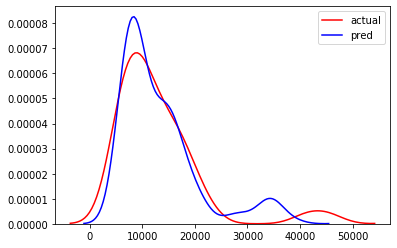

In [38]:
import seaborn as sns
ax1=sns.distplot(y_test, hist=False, color='r',label='actual')
sns.distplot(y_pred, hist=False,color='b',label='pred',ax=ax1)

### SGD

In [39]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l1', eta0=0.03)
sgd_reg.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.03, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

#### Validation on training set

In [40]:
y_pred = sgd_reg.predict(X_train)
sgd_mse = mean_squared_error(y_train, y_pred)
sgd_rmse = np.sqrt(sgd_mse)
sgd_rmse

2332.6654021399036

#### Cross-validation

In [41]:
sgd_scores = cross_val_score(sgd_reg, X, y, scoring='neg_mean_squared_error', cv=10)
sgd_rmse_scores = np.sqrt(-sgd_scores)
display_scores(sgd_rmse_scores)

Scores: [ 6264.84448904  2636.28738476  5051.62737096  4822.72545373
  3746.05259119  5755.68166377 10802.03816237  2633.75296884
  2523.47733546  2722.68360615]
Mean: 4695.917102627041
Standart deviation: 2429.4431804663454


### Ridge

In [88]:
from sklearn.linear_model import Ridge

RMSE_train=[]
RMSE_cv=[]

alphas = [0.001, 0.005, 0.01, 0.02, 0.05, 1, 2, 5, 10,20, 40, 80, 160, 320, 640, 1280]

for alpha in alphas:
    RM = Ridge(alpha=alpha)
    RM.fit(X_train, y_train)
    y_pred = RM.predict(X_train)
    ridge_mse = mean_squared_error(y_train, y_pred)
    ridge_rmse = np.sqrt(ridge_mse)
    RMSE_train.append(ridge_rmse)
    
    ridge_scores = cross_val_score(RM, X, y, scoring='neg_mean_squared_error', cv=10)
    ridge_rmse_scores = np.sqrt(-ridge_scores)
    RMSE_cv.append(ridge_rmse_scores.mean())

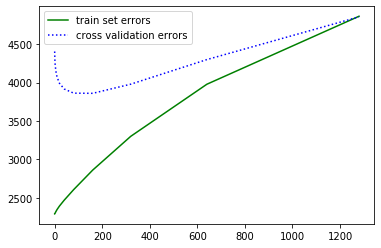

In [89]:
import matplotlib.pyplot as plt

plt.plot(alphas, RMSE_train, '-g', label='train set errors')
plt.plot(alphas, RMSE_cv, ':b', label='cross validation errors')

plt.legend();

In [93]:

ridge_reg = Ridge(alpha=170, solver='cholesky')
ridge_reg.fit(X_train,y_train)

Ridge(alpha=170, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [94]:
y_pred = ridge_reg.predict(X_train)
ridge_mse = mean_squared_error(y_train, y_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

2890.7167610517517

In [95]:
ridge_scores = cross_val_score(ridge_reg, X, y, scoring='neg_mean_squared_error', cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)
display_scores(ridge_rmse_scores)

Scores: [5963.69240885 1857.34879559 3907.48220321 6669.34783454 3009.85369445
 3685.50369318 7172.51647479 1061.67469499 3233.23657796 2087.44784022]
Mean: 3864.8104217790265
Standart deviation: 1985.4962394275813


#### Save the models

In [47]:
import joblib
joblib.dump(lin_reg, 'lin_reg.pkl')
joblib.dump(tree_reg, 'tree_reg.pkl')
joblib.dump(forest_reg, 'forest_reg.pkl')
joblib.dump(forest_reg, 'ridge_reg.pkl')
joblib.dump(forest_reg, 'sgd_reg.pkl')

['sgd_reg.pkl']

### Comparing model performances

In [48]:
new_df= {'linear_regression': [lin_rmse, lin_rmse_scores.mean()],
         'decision_tree': [tree_rmse, tree_rmse_scores.mean()],
         'random_forest': [forest_rmse, forest_rmse_scores.mean()],
         'SGD': [sgd_rmse, sgd_rmse_scores.mean()],
         'ridge': [ridge_rmse, ridge_rmse_scores.mean()]
         }

new_df = pd.DataFrame(new_df, index=['train_set_val','cross_val'])
new_df

,linear_regression,decision_tree,random_forest,SGD,ridge
train_set_val,2289.640388,242.876650,808.819907,2332.665402,2289.640713
cross_val,4406.070206,4011.042499,3234.641194,4695.917103,4405.057751


### Fine-Tuning the Model